# Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS

from pandas import DataFrame


# Reading in the Data

In [2]:
df = pd.read_csv('COVID19Tweets_HA_final_v2.csv')

In [3]:
df.head()

,Unnamed: 0,index,Tweet Id,text,Tweet Datetime,Source,tags,Retweets,Favorites,Twitter @ Name,user loc,verified,followers,tweets
0,0,0,1369043001851469825,This is an excellent resource for health prof...,2021-03-08 21:51:01,Twitter Web App,NaN,9,0,JHUrbanHealth,"Baltimore, MD",False,1816,3243
1,1,1,1369043000307879939,Obese COVID19 patients are more likely to expe...,2021-03-08 21:51:01,Twitter Web App,"Obese,COVID19",0,0,SVestiga,"Leesburg, Virginia",False,73,268
2,2,2,1369042999745912840,Member Snapshot Every day InterAction Member...,2021-03-08 21:51:01,Sprout Social,NaN,0,0,InterActionOrg,"Washington, DC",True,34442,23318
3,3,3,1369042999699791880,We have released a new COVID19 guidance do...,2021-03-08 21:51:01,Twitter for iPhone,COVID19,8,0,mrsgossett10,Louisville Male High School,False,184,3646
4,4,4,1369042999385059330,Inclusion in s list of women sharing lessons...,2021-03-08 21:51:01,Twitter Web App,Taiwan,105,0,tanenori,埼玉県川口市,False,1493,337086


# Various EDA

In [4]:
df.dtypes

Unnamed: 0         int64
index              int64
Tweet Id           int64
text              object
Tweet Datetime    object
Source            object
tags              object
Retweets           int64
Favorites          int64
Twitter @ Name    object
user loc          object
verified            bool
followers          int64
tweets             int64
dtype: object

In [5]:
df.shape

(34081, 14)

In [6]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


In [7]:
df.count()

Unnamed: 0        34081
index             34081
Tweet Id          34081
text              34081
Tweet Datetime    34081
Source            33852
tags              25238
Retweets          34081
Favorites         34081
Twitter @ Name    34081
user loc          26861
verified          34081
followers         34081
tweets            34081
dtype: int64

In [8]:
print(df.isnull().sum())

Unnamed: 0           0
index                0
Tweet Id             0
text                 0
Tweet Datetime       0
Source             229
tags              8843
Retweets             0
Favorites            0
Twitter @ Name       0
user loc          7220
verified             0
followers            0
tweets               0
dtype: int64


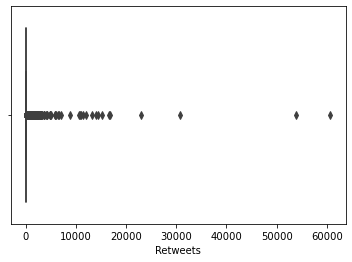

In [9]:
sns.boxplot(x=df['Retweets'])

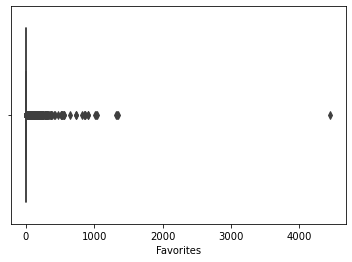

In [10]:
sns.boxplot(x=df['Favorites'])

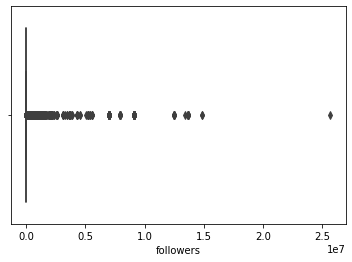

In [11]:
sns.boxplot(x=df['followers'])

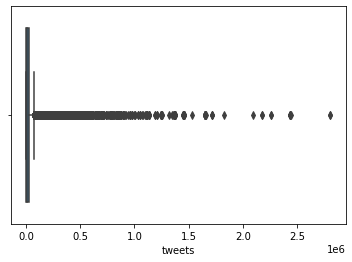

In [12]:
sns.boxplot(x=df['tweets'])

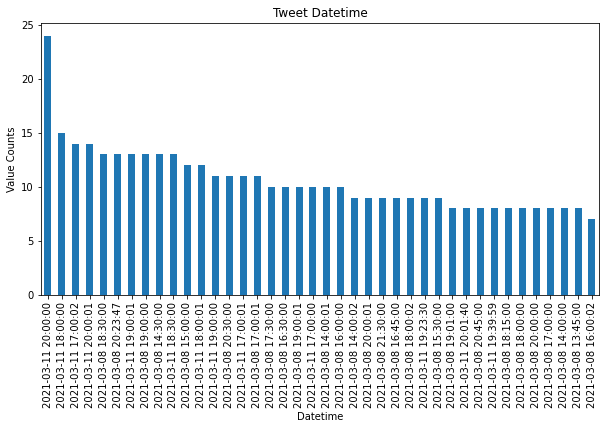

In [13]:
df['Tweet Datetime'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Tweet Datetime')
plt.ylabel('Value Counts')
plt.xlabel('Datetime');

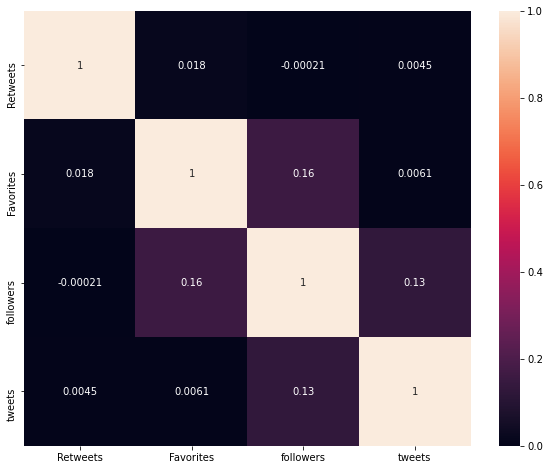

In [14]:
plt.figure(figsize = (10,8))

sns.heatmap(df[['Retweets', 'Favorites', 'followers', 'tweets']].corr(), annot=True)
plt.show()

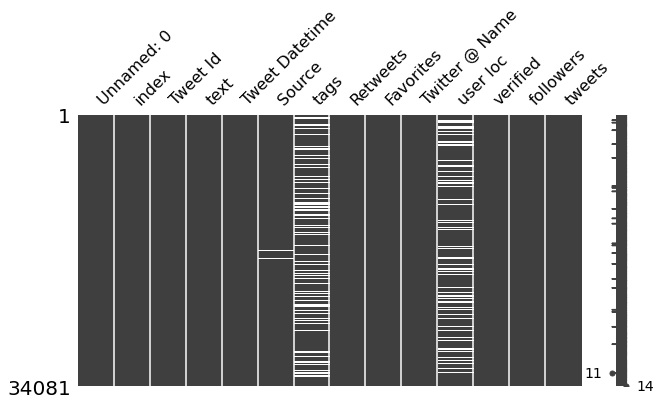

In [15]:
missingno.matrix(df, figsize = (10,5))

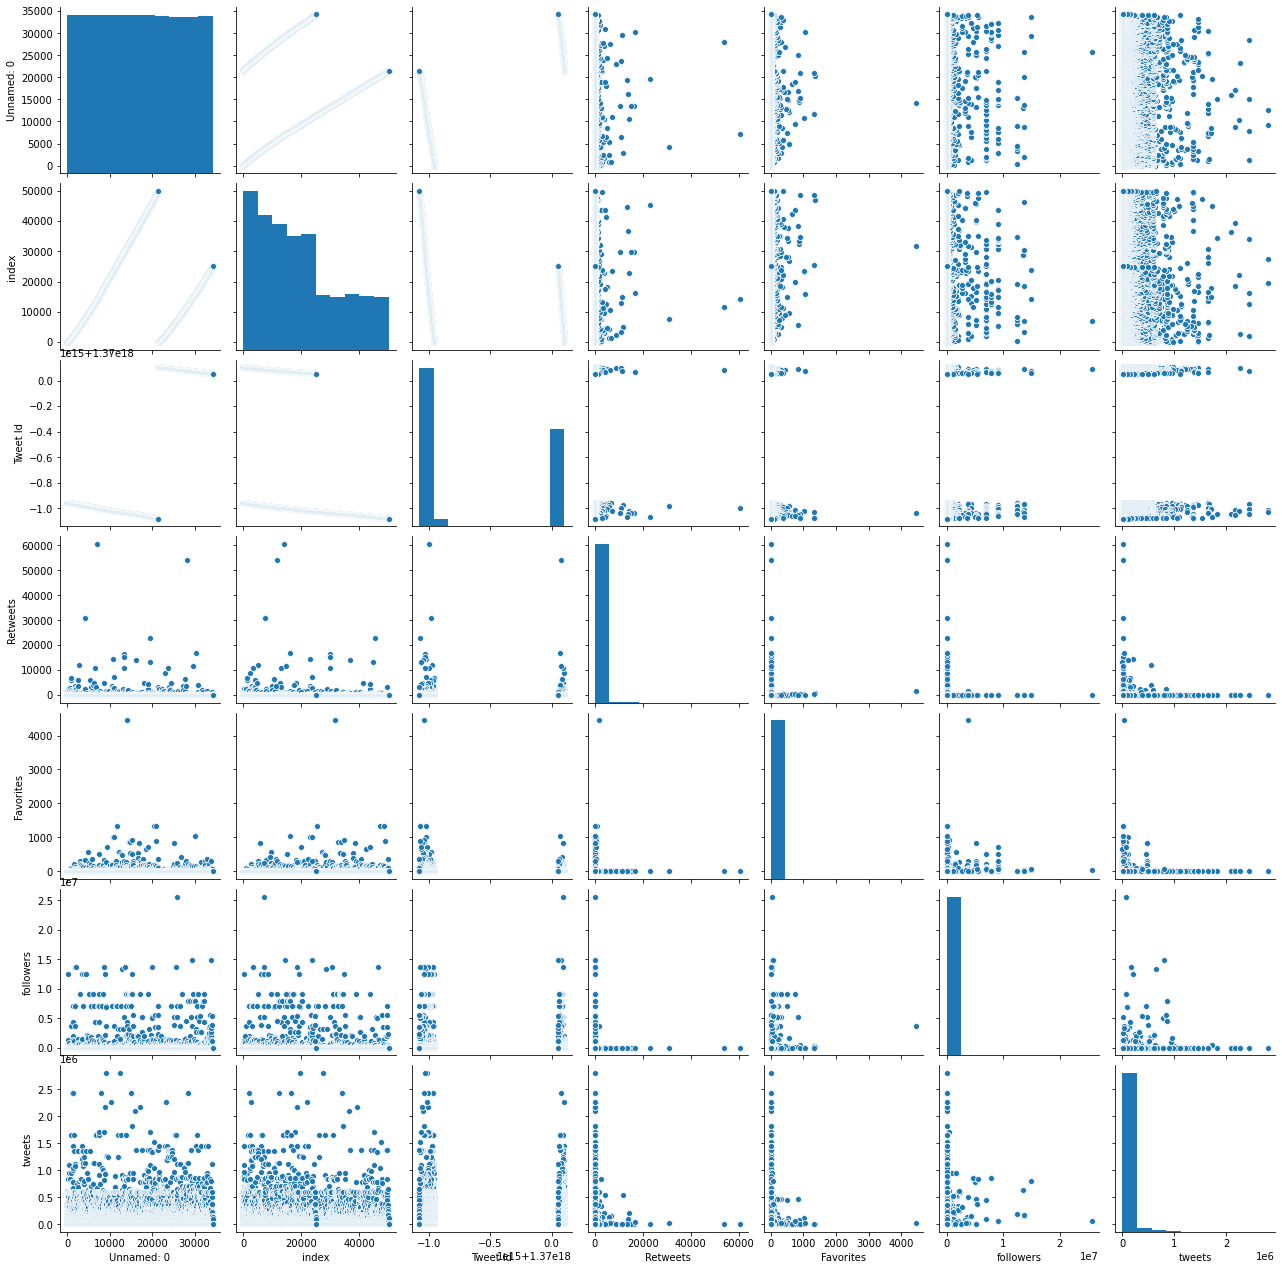

In [16]:
df_hist = df.drop([
      'text', 'Tweet Datetime','Source','tags','Twitter @ Name','user loc','verified'
], axis=1)

sns.pairplot(df_hist)

/Users/meghanrokas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/meghanrokas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/meghanrokas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/meghanrokas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3379 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/meghanrokas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/meghanrokas/opt/anaconda3/lib/pyt

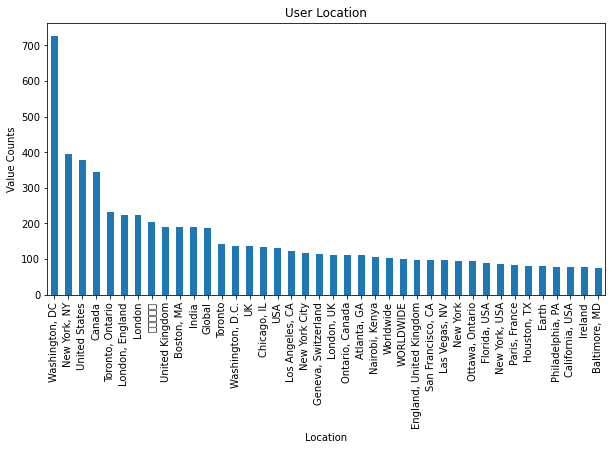

In [18]:
df['user loc'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('User Location')
plt.ylabel('Value Counts')
plt.xlabel('Location');

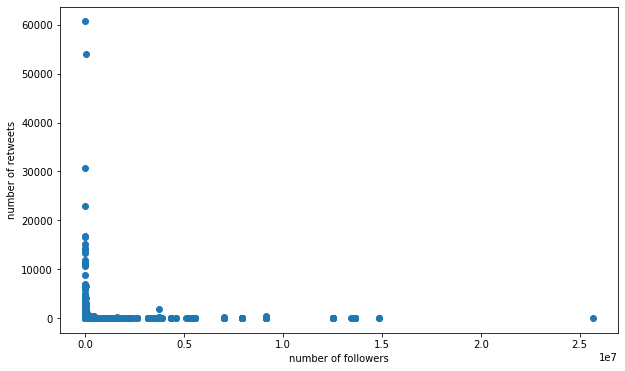

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['followers'], df['Retweets'])
ax.set_xlabel('number of followers')
ax.set_ylabel('number of retweets')
plt.show()

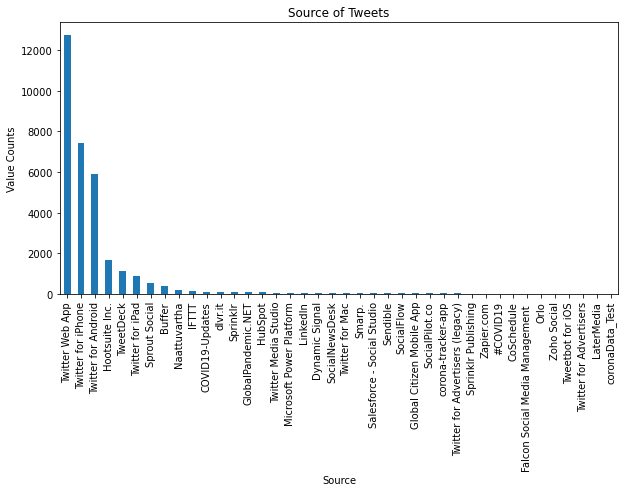

In [32]:
df['Source'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Source of Tweets')
plt.ylabel('Value Counts')
plt.xlabel('Source');